In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from numpy import arange
from math import exp

In [2]:
def euler_method(function, x_list, y_0, n):
    h = (x_list[-1] - x_list[0])/n
    new_x = arange(x_list[0], x_list[-1] + h, h)
    new_y = [y_0]
    for i in range(1, len(new_x)):
        new_y.append( new_y[i - 1] + h * function(new_x[i - 1], new_y[i - 1]) )
    return (new_x, new_y)

def euler_method_recal(function, x_list, y_0, n):
    h = (x_list[-1] - x_list[0])/n
    new_x = arange(x_list[0], x_list[-1] + h, h)
    new_y = [y_0]
    for i in range(1, len(new_x)):
        new_y.append(new_y[i - 1] + h * (function(new_x[i - 1], new_y[i - 1]) 
                                         + function(new_x[i], new_y[i - 1] + h * function(new_x[i - 1], new_y[i - 1])))/2)
    return (new_x, new_y)

def runge_kutta_4(function, x_list, y_0, n):
    h = (x_list[-1] - x_list[0])/n
    new_x = arange(x_list[0], x_list[-1] + h, h)
    new_y = [y_0]
    for i in range(1, len(new_x)):
        k_1 = function(new_x[i - 1], new_y[i - 1])
        k_2 = function(new_x[i - 1] + h/2, new_y[i - 1] + k_1 * h/2)
        k_3 = function(new_x[i - 1] + h/2, new_y[i - 1] + k_2 * h/2)
        k_4 = function(new_x[i - 1] + h, new_y[i - 1] + k_3 * h)
        new_y.append(new_y[i - 1] + h * (k_1 + 2 * k_2 + 2 * k_3 + k_4)/6)  
    return (new_x, new_y)

In [3]:
p_0 = 0.126e5
L = 2.26e6
R_0 = 8.31
mu = 0.018
R = R_0/mu
k = L/R
T_0 = 273 + 50

start, end, h, n = 273 + 50, 273 + 50 + 50, 5, 10

f = lambda x, y : k * y/(x ** 2)

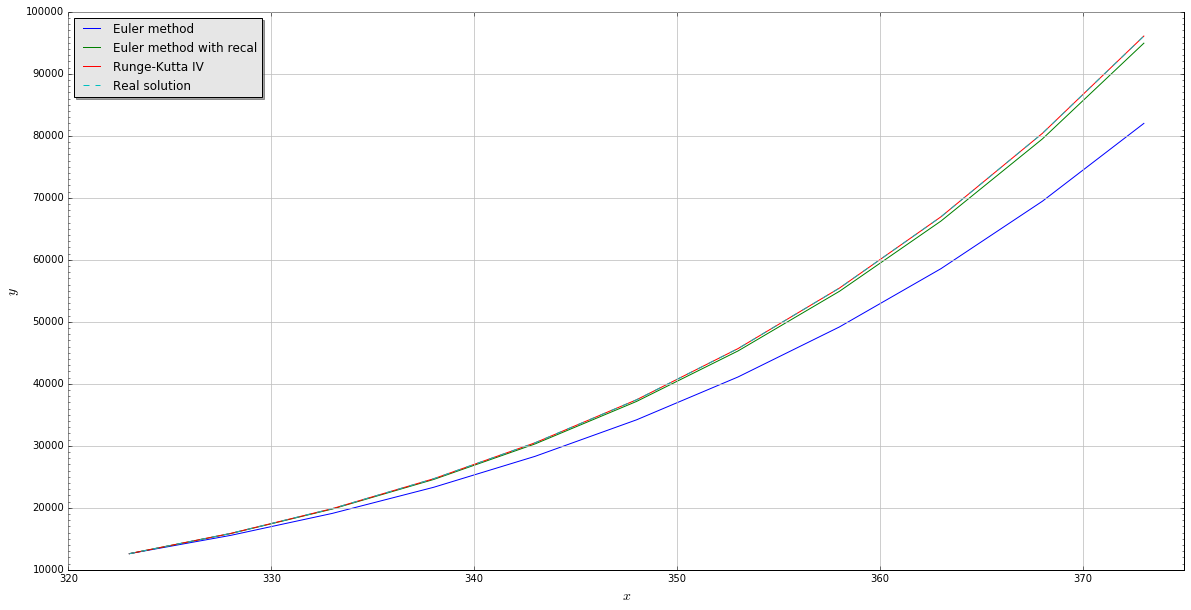

In [4]:
fig, ax = plt.subplots(figsize=(20,10))

xs, ys = euler_method(f, arange(start, end + h, h), p_0, n)
ax.plot(xs, ys, '-',label = 'Euler method')

xs, ys = euler_method_recal(f, arange(start, end + h, h), p_0, n)
ax.plot(xs, ys, '-',label = 'Euler method with recal')

xs, ys = runge_kutta_4(f, arange(start, end + h, h), p_0, n)
ax.plot(xs, ys, '-',label = 'Runge-Kutta IV')

xs = arange(start, end + h, h)
ys = [p_0 * exp(k * (1/T_0 - 1/x)) for x in xs]
ax.plot(xs, ys, '--',label = 'Real solution')

plt.xlim(320, 375)
plt.ylim(1e4, 1e5)

plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14)

ax.xaxis.set_minor_locator(plt.MultipleLocator(1000))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1000))

ax.axhline(0, color = 'black')
ax.axvline(0, color = 'black')

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

legend = ax.legend(loc = 'upper left', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

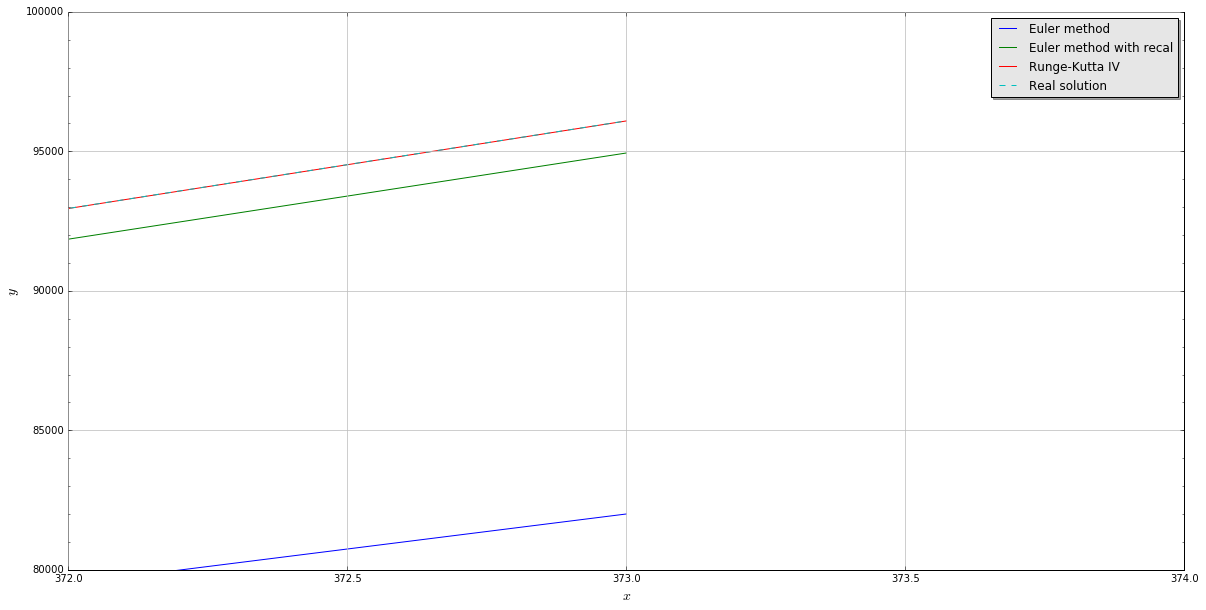

In [12]:
fig, ax = plt.subplots(figsize=(20,10))

xs, ys = euler_method(f, arange(start, end + h, h), p_0, n)
ax.plot(xs, ys, '-',label = 'Euler method')

xs, ys = euler_method_recal(f, arange(start, end + h, h), p_0, n)
ax.plot(xs, ys, '-',label = 'Euler method with recal')

xs, ys = runge_kutta_4(f, arange(start, end + h, h), p_0, n)
ax.plot(xs, ys, '-',label = 'Runge-Kutta IV')

xs = arange(start, end + h, h)
ys = [p_0 * exp(k * (1/T_0 - 1/x)) for x in xs]
ax.plot(xs, ys, '--',label = 'Real solution')

plt.xlim(372, 374)
plt.ylim(8e4, 1e5)

plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14)

ax.xaxis.set_minor_locator(plt.MultipleLocator(1000))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1000))

ax.axhline(0, color = 'black')
ax.axvline(0, color = 'black')

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()